## **Data Visualization**

### Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import seaborn as sns

### Load The Dataset


In [2]:
df_origin = pd.read_csv('../data/ireland-news-headlines.csv')
df = df_origin.copy()

### Analayze The Dataset

Arrangement of the DataFrame.

In [3]:
df['publish_date'] = pd.to_datetime(df['publish_date'], format='%Y%m%d')
df['year'] = df['publish_date'].dt.year
df['month'] = df['publish_date'].dt.month
df['day'] = df['publish_date'].dt.day
df.drop('publish_date', axis=1, inplace=True)
print(df.shape)
print(df.head())

(1611495, 5)
  headline_category                                    headline_text  year  \
0              news         UUP sees possibility of voting Major out  1996   
1              news   Pubs targeted as curbs on smoking are extended  1996   
2              news  Papers reveal secret links with O'Neill cabinet  1996   
3              news      Domestic chaos as Italy takes EU presidency  1996   
4              news     Learning about the star to which we owe life  1996   

   month  day  
0      1    2  
1      1    2  
2      1    2  
3      1    2  
4      1    2  


#### Erase duplicated rows and nan cells

In [4]:
print(f'Number of duplicated rows: {df.iloc[:,:-3].duplicated().sum()}')

Number of duplicated rows: 86916


In [5]:
df.drop_duplicates(subset=['headline_category', 'headline_text'],inplace=True)
df = df.dropna() 
df = df.reset_index()
df = df.iloc[:,1:]
print(df.shape)

(1524575, 5)


In [6]:
df25 = df.copy()

#### Visualization

Split the headline category to 4 levels
First we will only look at the headline in the first level

In [39]:
df[['headline_category', 'headline_category_2', 'headline_category_3', 'headline_category_4']] = df['headline_category'].str.split('.', expand=True)
Num_pri_classes = len(df['headline_category'].unique())
print(f'Number of primary classes: {Num_pri_classes}')
Names_pri_classes = df['headline_category'].unique()
print(f'The classes are: {Names_pri_classes}')
Num_all_classes = len(df_origin['headline_category'].unique())
print(f'Number of all the classes: {Num_all_classes}')

Number of primary classes: 6
The classes are: ['news' 'culture' 'opinion' 'business' 'sport' 'lifestyle']
Number of all the classes: 103


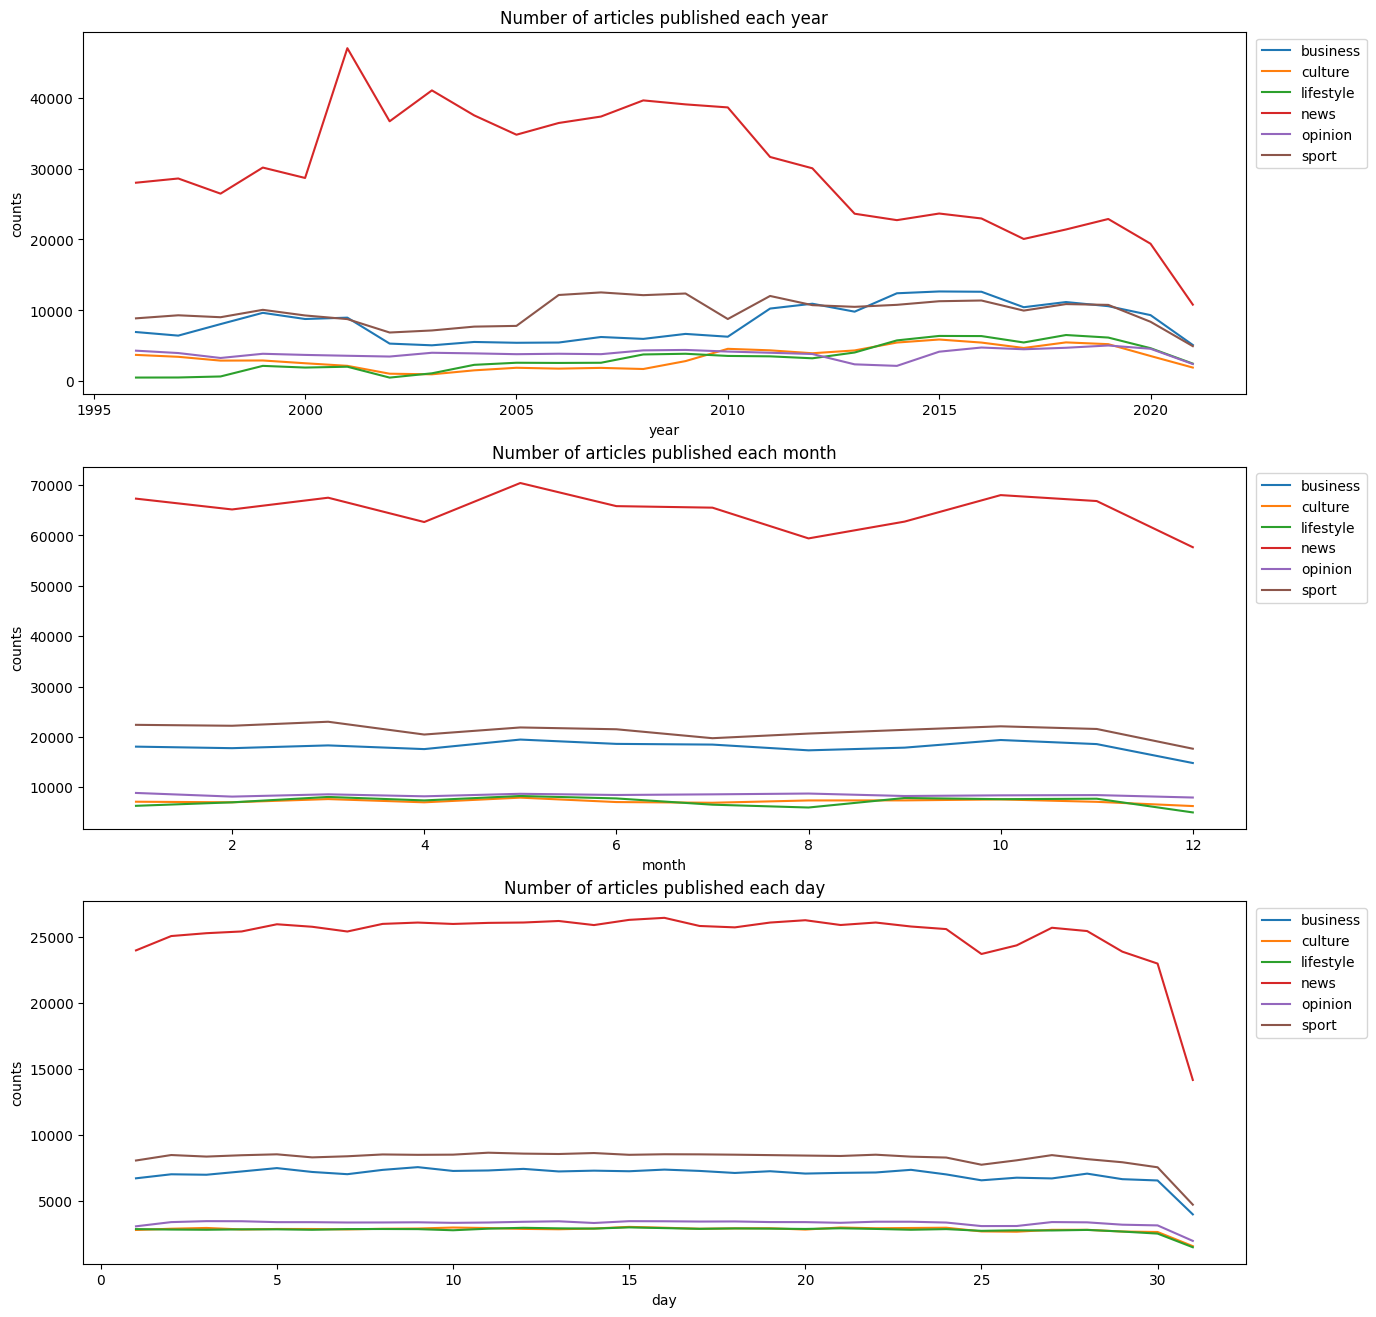

In [8]:
fig, axs=plt.subplots(3,1,figsize=(15,16))
df.groupby(['year','headline_category'])['headline_category'].agg('count').unstack('headline_category').plot(ax=axs[0])
axs[0].legend(loc=0, ncol=1,bbox_to_anchor=(1.11,1))
axs[0].set_title("Number of articles published each year")
axs[0].set_ylabel('counts')
axs[0].set_xlabel('year')
df.groupby(['month','headline_category'])['headline_category'].agg('count').unstack('headline_category').plot(ax=axs[1])
axs[1].legend(loc=0, ncol=1,bbox_to_anchor=(1.11,1))
axs[1].set_title("Number of articles published each month")
axs[1].set_ylabel('counts')
axs[1].set_xlabel('month')
df.groupby(['day','headline_category'])['headline_category'].agg('count').unstack('headline_category').plot(ax=axs[2])
axs[2].legend(loc=0, ncol=1,bbox_to_anchor=(1.11,1))
axs[2].set_title("Number of articles published each day")
axs[2].set_ylabel('counts')
axs[2].set_xlabel('day')
plt.show()


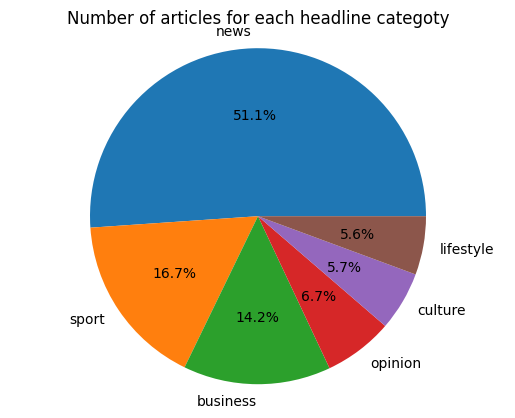

In [9]:
category_counts = df['headline_category'].value_counts()
plt.figure()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Number of articles for each headline categoty')
# plt.title('Distribution of Categories')
plt.axis('equal')
plt.show()

### 25 classes

In [7]:
k = 0
num25 = []
classes25 = []
for cat in df25['headline_category'].unique():
    summ = sum(df25['headline_category'] == cat)
    if summ > 10000:
        k +=1
        # print(f'headline_category: {cat} number of rows: {summ}')
        num25.append(summ)
        classes25.append(cat)
# print(k)
df_25_count = pd.DataFrame(columns=['classes', 'countt'])
df_25_count['classes'] = classes25
df_25_count['countt'] = num25
# df_25.countt = pd.to_numeric(df_25.countt, errors='coerce')
df_25 = df_25_count.sort_values('countt', ascending=False)
# df_25

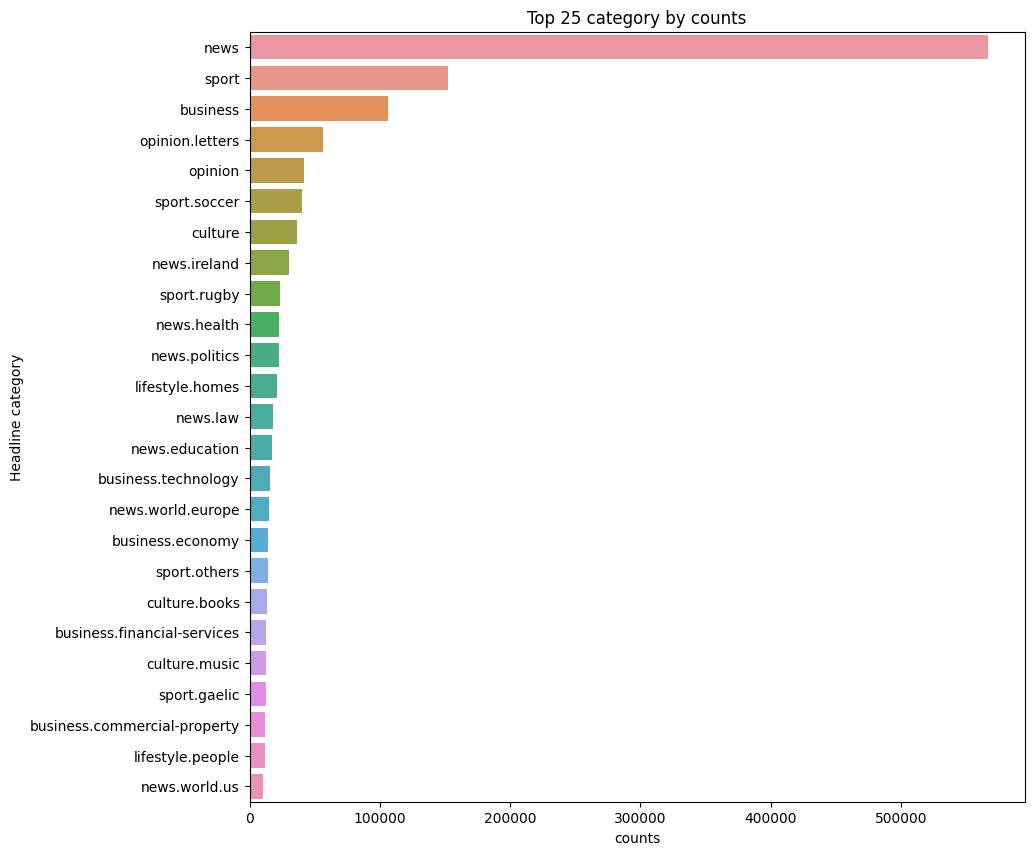

In [8]:
fig,ax=plt.subplots(figsize=(10,10))
df_25_category=df25[df25['headline_category'].isin(list(df25.headline_category.value_counts()[:25].index[:25]))]
sns.barplot(y=df_25_category.headline_category.value_counts().index,x=df_25_category.headline_category.value_counts(),ax=ax)
ax.set_title("Top 25 category by counts")
ax.set_xlabel('counts')
ax.set_ylabel('Headline category')
plt.show()

#### Clean The Data

* converting all letters to lower case
* removing numbers
* removing punctuations
* removing stop words
* Inflections of a word

In [42]:
df_6_category = df.iloc[:,:-3].copy()

In [43]:
df_6_category.insert(2, "clean_headline_text",  None)
df_25_category.insert(2, "clean_headline_text",  None)

In [44]:
words_to_clean = ['u', '-','–']
words_to_clean

['u', '-', '–']

In [46]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import string

# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('stopwords')
stemmer= PorterStemmer()
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [13]:
# 6 categories clean
for i, text in enumerate(df_6_category["headline_text"]):
    clean_text = text.lower() # converting all letters to lower case
    clean_text = re.sub(r'\d+', '', clean_text) # removing numbers
    clean_text = clean_text.translate(str.maketrans("","", string.punctuation)) # removing punctuations
    clean_text = clean_text.strip() # removing whitespaces
    wo_sw = ''
    for word in clean_text.split():
        if word not in stopwords: # removing stop words
            word = stemmer.stem(word)
            word = lemmatizer.lemmatize(word) # Inflections of a word
            if word not in words_to_clean: # removing words_to_clean
                wo_sw += word + ' '
    clean_text = wo_sw 
    if len(clean_text) > 1:
        df_6_category["clean_headline_text"][i] = clean_text

/tmp/ipykernel_17120/3046798673.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6_category["clean_headline_text"][i] = clean_text


In [ ]:
# 25 categories clean
for i, text in enumerate(df_25_category["headline_text"]):
    clean_text = text.lower() # converting all letters to lower case
    clean_text = re.sub(r'\d+', '', clean_text) # removing numbers
    clean_text = clean_text.translate(str.maketrans("","", string.punctuation)) # removing punctuations
    clean_text = clean_text.strip() # removing whitespaces
    wo_sw = ''
    for word in clean_text.split():
        if word not in stopwords: # removing stop words
            word = stemmer.stem(word)
            word = lemmatizer.lemmatize(word) # Inflections of a word
            if word not in words_to_clean: # removing words_to_clean
                wo_sw += word + ' '
    clean_text = wo_sw 
    if len(clean_text) > 1:
        df_25_category["clean_headline_text"][i] = clean_text

In [14]:
sum(df_6_category['clean_headline_text'].isna())

284

In [15]:
# # Drop Nan
df_6_category = df_6_category.dropna() 
df_6_category = df_6_category.reset_index()
df_6_category = df_6_category.iloc[:,1:]
sum(df_6_category['clean_headline_text'].isna())

0

In [48]:
sum(df_25_category['clean_headline_text'].isna())

142731

In [49]:
df_25_category = df_25_category.dropna() 
df_25_category = df_25_category.reset_index()
df_25_category = df_25_category.iloc[:,1:]
sum(df_25_category['clean_headline_text'].isna())

0

In [51]:
# save cleaned data
df_25_category.to_csv('../data/ireland-news-headlines-cleaned-25.csv')  
df_6_category.to_csv('../data/ireland-news-headlines-cleaned-6.csv')  

In [ ]:
# load cleaned data
df_cleaned = pd.read_csv('../data/ireland-news-headlines-cleaned-6.csv')
df_cleaned = df_cleaned.iloc[:,1:]

In [53]:
sum(df_cleaned['clean_headline_text'].isna())

0

Display of repeated words in the data by title in a word cloud

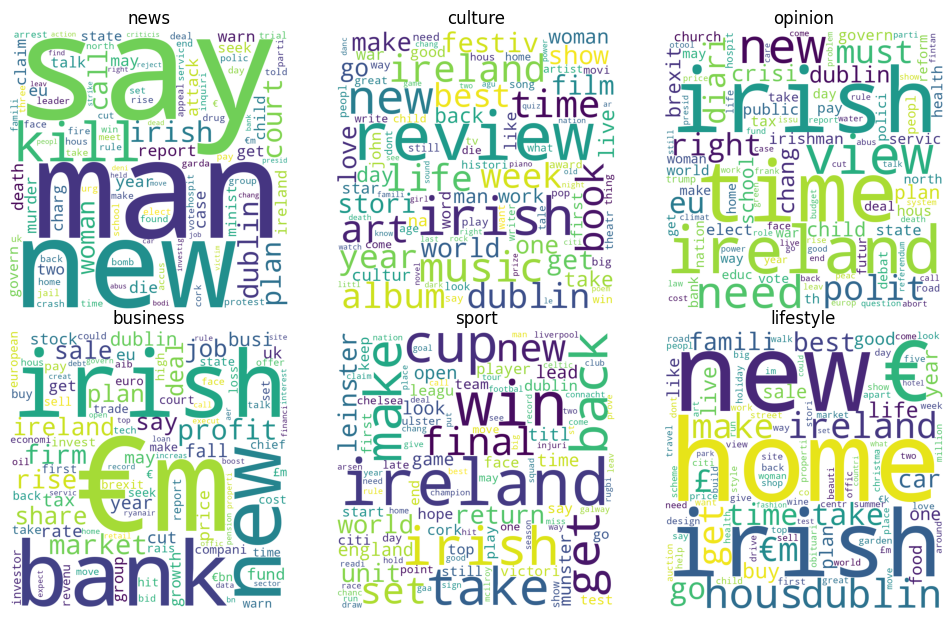

In [19]:
from wordcloud import WordCloud

word_clouds = []
top_5 = []
for cat in df_cleaned['headline_category'].unique():
    
    df3 = df_cleaned[df_cleaned['headline_category'] == cat] 
    df3 = df3['clean_headline_text'].astype(str)
    text = ' '.join(df3.tolist())

    word_frequencies = {}
    for word in text.split():
        if word not in word_frequencies:
            word_frequencies[word] = 0
        word_frequencies[word] += 1

    wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100).generate_from_frequencies(word_frequencies)
    word_clouds.append(wordcloud)
    top_5_words = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:5]
    top_5.append(top_5_words)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6), facecolor=None)
axes[0, 0].imshow(word_clouds[0])
axes[0, 0].set_title('news')
axes[0, 0].axis('off')
axes[0, 1].imshow(word_clouds[1])
axes[0, 1].set_title('culture')
axes[0, 1].axis('off')
axes[0, 2].imshow(word_clouds[2])
axes[0, 2].set_title('opinion')
axes[0, 2].axis('off')
axes[1, 0].imshow(word_clouds[3])
axes[1, 0].set_title('business')
axes[1, 0].axis('off')
axes[1, 1].imshow(word_clouds[4])
axes[1, 1].set_title('sport')
axes[1, 1].axis('off')
axes[1, 2].imshow(word_clouds[5])
axes[1, 2].set_title('lifestyle')
axes[1, 2].axis('off')
plt.tight_layout(pad=0)
    
plt.show()

In [20]:
i = 0
for cat in df_cleaned['headline_category'].unique():
    print(f'Top 5 words in {cat}:')
    print(top_5[i])
    i+=1

Top 5 words in news:
[('say', 34132), ('man', 29779), ('new', 23105), ('kill', 19599), ('irish', 17992)]
Top 5 words in culture:
[('review', 5898), ('irish', 3355), ('new', 2681), ('music', 1998), ('art', 1695)]
Top 5 words in opinion:
[('irish', 4584), ('time', 4099), ('ireland', 2722), ('view', 2289), ('new', 1813)]
Top 5 words in business:
[('€m', 11864), ('irish', 10824), ('bank', 10210), ('new', 9467), ('profit', 7730)]
Top 5 words in sport:
[('ireland', 10283), ('win', 9553), ('cup', 6959), ('irish', 6764), ('take', 6465)]
Top 5 words in lifestyle:
[('home', 3937), ('new', 3671), ('irish', 3338), ('€', 2771), ('hous', 2563)]


#### Models

In [ ]:
# Group the DataFrame by 'headline' and sample 50 rows from each group
df_sampled = df_cleaned.groupby('headline_category').apply(lambda x: x.sample(n=2000)).reset_index(drop=True)
# df_sampled = df_sampled.iloc[-10000:,:]

##### t-SNE

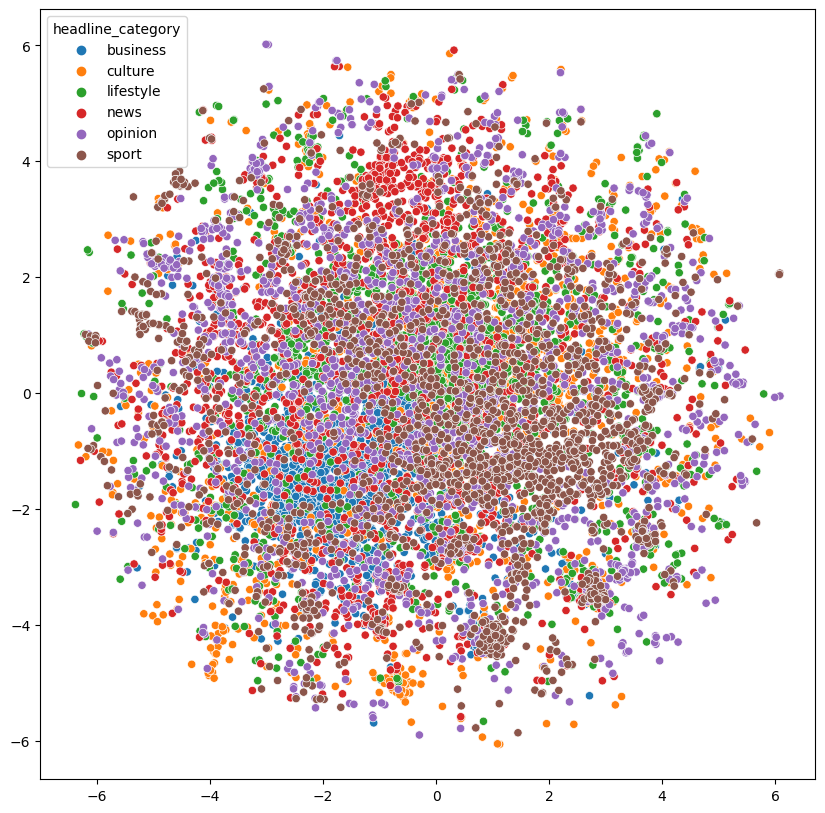

In [22]:
# t-SNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

# Create a TF-IDF vectorizer object
vectorizer = TfidfVectorizer()

# Convert article titles to TF-IDF vectors
tfidf_vectors = vectorizer.fit_transform(df_sampled['clean_headline_text'])

# Perform t-SNE on the TF-IDF vectors to reduce their dimensionality to 2D
tsne = TSNE(n_components=2,perplexity=300, random_state=42, init="random")
tsne_vectors = tsne.fit_transform(tfidf_vectors)

# Plot the 2D t-SNE vectors
plt.figure(figsize=(10, 10))
# plt.scatter(tsne_vectors[:, 0], tsne_vectors[:, 1], marker='.')
# plt.title('t-SNE Visualization of Article Titles')
# plt.xlabel('Dimension 1')
# plt.ylabel('Dimension 2')
# plt.show()
g = sns.scatterplot(data=df_sampled, x=tsne_vectors[:, 0] , y=tsne_vectors[:, 1] ,hue='headline_category')

##### LDA

In [23]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import LdaModel
from gensim.corpora.dictionary import Dictionary

# nltk.download('punkt')
# Step 1: Text preprocessing
# nltk.download('stopwords')
# nltk.download('wordnet')
# stop_words = set(stopwords.words('english'))
# lemmatizer = WordNetLemmatizer()

# Tokenizer function
def tokenize_sentence(sentence):
    return word_tokenize(sentence)


# Step 2: Tokenize the text
df_sampled['tokens'] = df_sampled['clean_headline_text'].apply(tokenize_sentence)

# Step 3: Create a document-term matrix
documents = df_sampled['tokens'].tolist()
dictionary = Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]

# Step 4: Apply LDA model
num_topics = 6
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

# Step 5: Interpret the topics
topics = lda_model.print_topics(num_topics=num_topics, num_words=2)
for topic in topics:
    print(topic)

(0, '0.010*"ireland" + 0.010*"new"')
(1, '0.016*"ireland" + 0.014*"win"')
(2, '0.008*"chang" + 0.008*"plan"')
(3, '0.009*"cork" + 0.008*"nation"')
(4, '0.014*"man" + 0.008*"munster"')
(5, '0.013*"irish" + 0.010*"view"')


##### Entity Names

In [31]:
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')

[nltk_data] Downloading package words to /home/roblab20/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

# Assuming your DataFrame is called 'df'
sentences = df_cleaned['headline_text'].tolist()

for sentence in sentences:
    # Tokenize the sentence into words
    words = word_tokenize(sentence)
    
    # Perform part-of-speech tagging
    tagged_words = pos_tag(words)
    
    # Perform named entity chunking
    named_entities = ne_chunk(tagged_words)
    
    # Print the named entities
    print(named_entities)
